In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)

In [34]:
dataset = load_boston()

In [35]:
class LinearRegression:

    def __init__(self, use_intercept: bool = True) -> None:
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None
        self.use_intercept = use_intercept

    def _add_intercept(self, x: np.ndarray) -> np.ndarray:
        intercepts = np.ones(shape=(x.shape[0]))
        x = np.column_stack((intercepts, x))
        return x

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        if self.use_intercept:
            x = self._add_intercept(x)
        inner = np.dot(x.T, x)
        inverse = np.linalg.inv(inner)
        beta = np.dot(np.dot(inverse, x.T), y)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, x: np.ndarray) -> np.ndarray:
        y_pred = self.coef_ * x + self.intercept_
        return y_pred

    def score(self, x: np.ndarray, y: np.ndarray) -> float:
        y_pred = self.predict(x)
        y_mean = np.mean(y, axis=0)
        numerator = np.sum((y - y_pred)**2)
        denominator = np.sum((y - y_mean)**2)
        r2_score = 1.0 - (numerator / denominator)

        return r2_score

In [36]:
x = dataset.data[:, 5]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [37]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r2_own = regr.score(x_test, y_test)
r2_sklearn = r2_score(y_test, y_pred)

print(f"coef: {regr.coef_}")
print(f"intercept: {regr.intercept_}")
print(f"R2 score: {r2_own}")
print(f"R2 sklearn: {r2_sklearn}")

coef: [9.1181022]
intercept: -34.662307438401555
R2 score: 0.4584649934303081
R2 sklearn: 0.4584649934303081


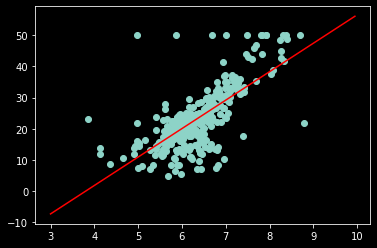

In [38]:


x_arange = np.arange(start=3.0, stop=10.0, step=0.05)
y_arange = regr.predict(x_arange)

plt.scatter(x_train, y_train)
plt.plot(x_arange, y_arange, color="red")
plt.show()